In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [19]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
'''data=rawdata[rawdata.Newspaper <= 30]'''
display(data.head())
data['tvsqrt'] = np.sqrt(data['TV'])
data['radiosqrt'] = np.sqrt(data['Radio'])
data['newspaperlog'] = np.log(data['Newspaper'])

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['tvsqrt','Radio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[0.97485384 0.1944958 ]]

Intercept: 
 [-1.617931]

R-squared:
0.9289507061869382


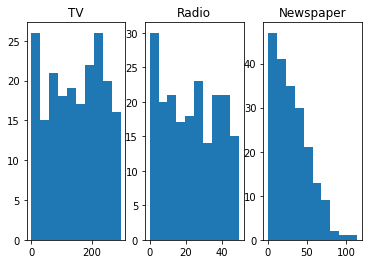

In [20]:
plt.subplot(131)
plt.hist(data.TV)
plt.title('TV')
plt.subplot(132)
plt.hist(data.Radio)
plt.title('Radio')
plt.subplot(133)
plt.hist(data.Newspaper)
plt.title('Newspaper')

plt.show()

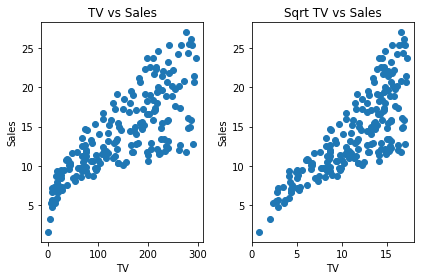

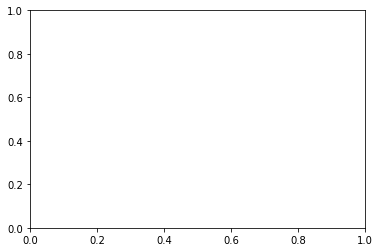

In [21]:
plt.subplot(121)
plt.scatter(data.TV, data.Sales)
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(122)
plt.scatter(np.sqrt(data.TV), data.Sales)
plt.title('Sqrt TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

plt.subplot()

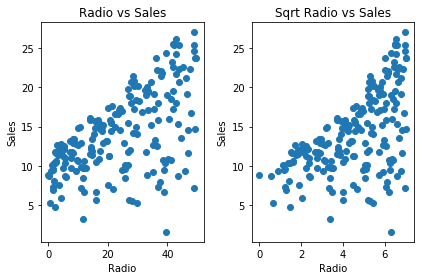

In [22]:
plt.subplot(121)
plt.scatter(data.Radio, data.Sales)
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(122)
plt.scatter(np.sqrt(data.Radio), data.Sales)
plt.title('Sqrt Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

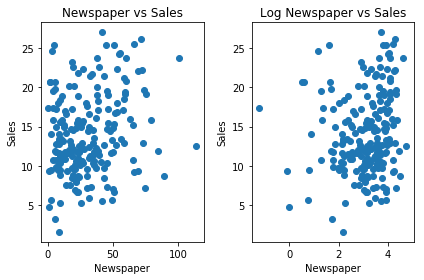

In [23]:
plt.subplot(121)
plt.scatter(data.Newspaper, data.Sales)
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.subplot(122)
plt.scatter(np.log(data.Newspaper), data.Sales)
plt.title('Log Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

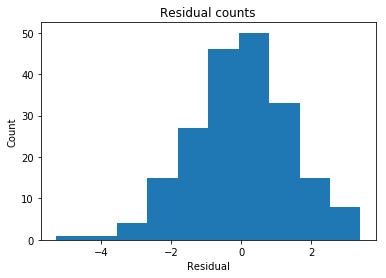

In [24]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
data['predictions'] = predicted
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted
data['residual'] = residual

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

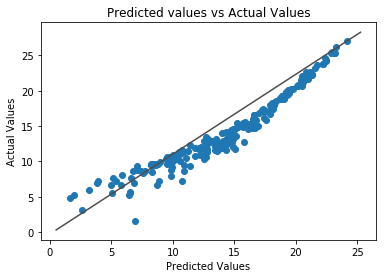

In [25]:
f, ax = plt.subplots()
plt.scatter(predicted, actual)
plt.title('Predicted values vs Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c=".3")

plt.show()

In [26]:
display(data.head())
print(data.shape)

,Unnamed: 0,TV,Radio,Newspaper,Sales,tvsqrt,radiosqrt,newspaperlog,predictions,residual
0,1,230.100,37.800,69.200,22.100,15.169,6.148,4.237,20.522,1.578
1,2,44.500,39.300,45.100,10.400,6.671,6.269,3.809,12.529,-2.129
2,3,17.200,45.900,69.300,9.300,4.147,6.775,4.238,11.352,-2.052
3,4,151.500,41.300,58.500,18.500,12.309,6.427,4.069,18.414,0.086
4,5,180.800,10.800,58.400,12.900,13.446,3.286,4.067,13.591,-0.691


(200, 10)


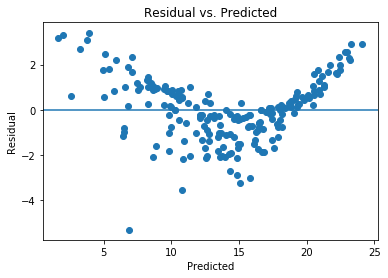

In [27]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [28]:
correlation_matrix = X.corr()
display(correlation_matrix)

,tvsqrt,Radio
tvsqrt,1.000,0.029
Radio,0.029,1.000


In [29]:
data[data.residual < -2].sort_values('residual').describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales,tvsqrt,radiosqrt,newspaperlog,predictions,residual
count,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000
mean,87.067,141.247,21.987,40.680,10.027,10.261,4.035,3.406,12.661,-2.635
std,67.518,119.560,20.844,28.654,3.004,6.207,2.473,0.862,2.523,0.894
min,2.000,0.700,2.300,8.500,1.600,0.837,1.517,2.140,6.900,-5.300
25%,18.000,17.050,3.400,16.300,9.000,4.129,1.844,2.772,11.121,-2.935
50%,101.000,199.800,4.300,43.000,11.500,14.135,2.074,3.761,13.581,-2.129
75%,134.000,248.700,41.650,59.950,11.850,15.764,6.452,4.081,14.560,-2.071
max,179.000,290.700,48.900,89.400,12.800,17.050,6.993,4.493,15.801,-2.052
